# Imports & Working Directory
In order to ensure all imports are available and that paths are relative to this script’s location, we first import modules and set the working directory.

In [1]:
from aimon import ChangeEventCollection
import os
import matplotlib.pyplot as plt

# Set current directory to the location of the notebook (works even if __file__ is not defined)
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

os.chdir(current_dir)


# Define Paths & Filtering Rule
To keep configuration centralized, we declare our input/output paths and the rule we’ll use to filter events. <br>

filter_rule = {
    "<feature_name>": {"min": <lower_bound>, "max": <upper_bound>},
    "<another_feature>": {"max": <upper_bound_only>}
}

In [2]:
# Path to the unlabelled change events and output folder
change_events_file = "../test_data/change_events_unlabelled.json"
outfolder          = "../test_data/out"
os.makedirs(outfolder, exist_ok=True)

filter_rule = {
    "change_mean": {"min": 5, "max": 10}
    }

# Where to save the filtered events
filtered_file = os.path.join(outfolder, 'change_events_filtered_rule_based.json')


# Load, Filter & Save Events
In order to apply our rule-based filter, we load all events into a collection, filter by filter_rule, then save the remaining events.

In [5]:
# Load all change events
coll = ChangeEventCollection().load_from_file(change_events_file)

# Convert to DataFrame and keep a copy of the unfiltered data
coll.to_dataframe()
unfiltered_df = coll.df

# Apply rule-based filtering
coll.events = coll.filter_events_rule_based(filter_rule)
# Save the filtered subset to JSON
coll.save_to_file(filtered_file)
_ = coll.to_dataframe()


# Visualize Unfiltered vs. Filtered
To inspect what was removed versus what remains, we re-generate the DataFrame on the filtered collection and plot both sets.

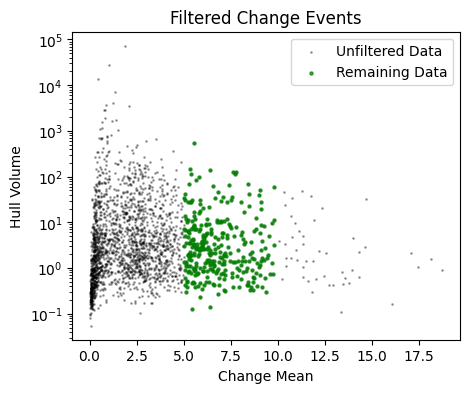

In [7]:
# Helper to plot a subset
def plot_events(df, event_type, color, alpha=0.7, size=5):
    subset = df[df['event_type'] == event_type]
    plt.scatter(
        subset['change_mean'],
        subset['hull_volume'],
        label=event_type.replace('_', ' ').title(),
        alpha=alpha,
        s=size,
        color=color
    )

# Tag the full (to‑be‑removed) and filtered DFs
unfiltered_labeled = unfiltered_df.assign(event_type='unfiltered_data')
filtered_labeled   = coll.df.assign(event_type='remaining_data')

plt.figure(figsize=(5, 4))
plot_events(unfiltered_labeled,   'unfiltered_data',   color='black', alpha=0.3, size=1)
plot_events(filtered_labeled,     'remaining_data', color='green',           size=5)

plt.yscale('log')
plt.legend()
plt.xlabel('Change Mean')
plt.ylabel('Hull Volume')
plt.title('Filtered Change Events')
plt.show()
